<a href="https://colab.research.google.com/github/manju-yadav211/Nse-Stock-prediction/blob/master/Nse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
!pip install pmdarima

In [191]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np


In [192]:
df=pd.read_csv("/content/drive/My Drive/shares.csv")

Here we have one by one loaded the data and then did analysis on it and the data is from August 2019 to August 2020.

1) first taken the data of Zee Entertainment.

2) Adani ports.

3) Kotak mahindra Bank.

#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

Moving Average
Introduction
‘Average’ is easily one of the most common things we use in our day-to-day lives. For instance, calculating the average marks to determine overall performance, or finding the average temperature of the past few days to get an idea about today’s temperature – these all are routine tasks we do on a regular basis. So this is a good starting point to use on our dataset for making predictions.

The predicted closing price for each day will be the average of a set of previously observed values. Instead of using the simple average, we will be using the moving average technique which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set. Here is a simple figure that will help you understand this with more clarity.

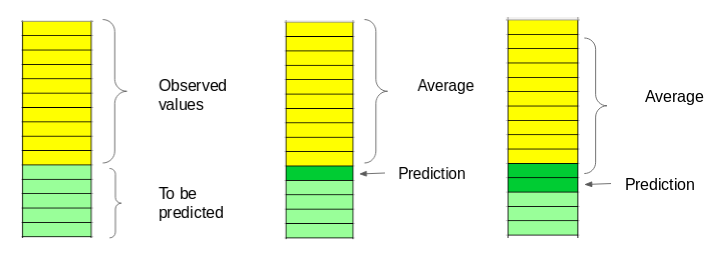

In [193]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,13-08-2019,328.700012,337.500000,325.799988,327.299988,327.299988,8077371
1,14-08-2019,331.149994,346.899994,331.149994,341.600006,341.600006,8277699
2,16-08-2019,343.700012,347.799988,336.299988,346.600006,346.600006,5719534
3,19-08-2019,345.549988,351.850006,342.649994,348.049988,348.049988,6986559
4,20-08-2019,349.500000,354.850006,346.549988,350.850006,350.850006,5975057
...,...,...,...,...,...,...,...
239,05-08-2020,144.600006,147.350006,141.699997,145.550003,145.550003,27773529
240,06-08-2020,146.500000,152.600006,146.000000,148.750000,148.750000,36848744
241,07-08-2020,149.449997,151.300003,148.750000,150.100006,150.100006,13680936
242,10-08-2020,150.600006,154.000000,149.000000,151.199997,151.199997,13342848


Here we understand that the there are 244 rows and 7 columns and the data is from 13-8-2019 to 11-08-2019

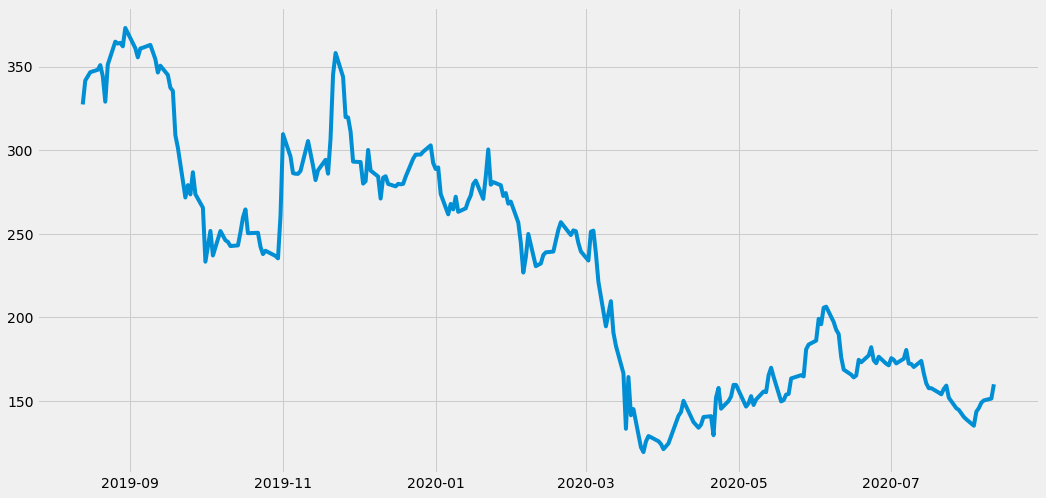

In [194]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

Here we have plotted the data to see the movement in a year.

Now there are many factors affecting the movement of the stocks and alot of news affects it and also government and political movements and decisions affect the movement of the stocks.

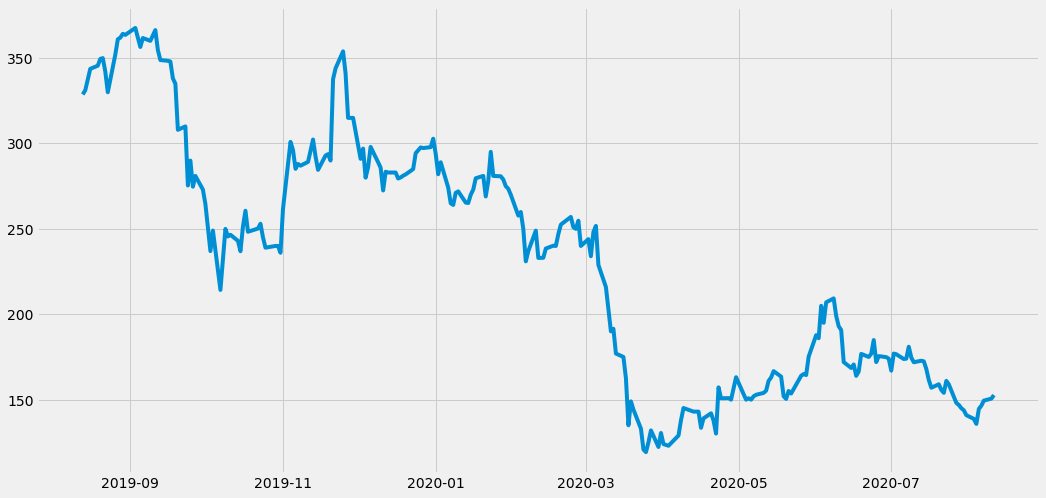

In [195]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Open'], label='open Price history')

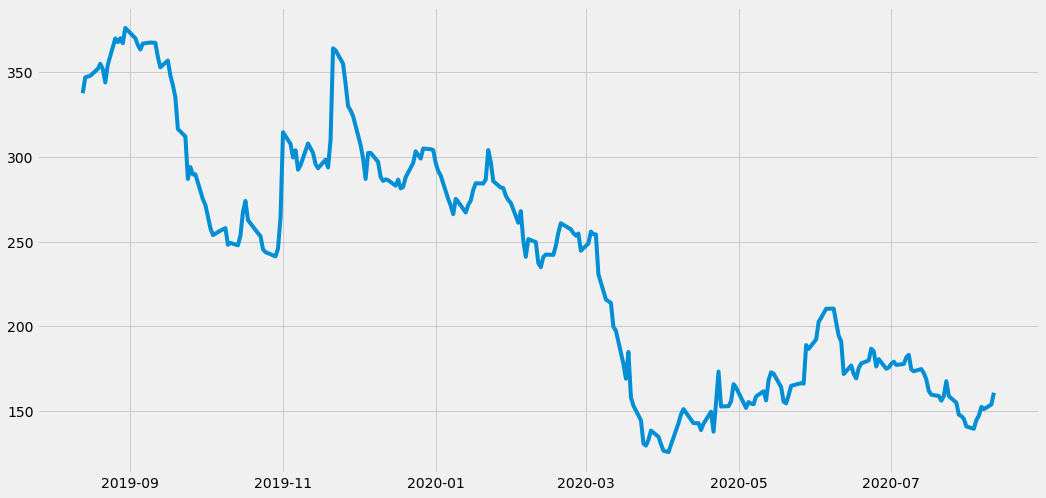

In [196]:


#plot
plt.figure(figsize=(16,8))
plt.plot(df['High'], label='High Price history')

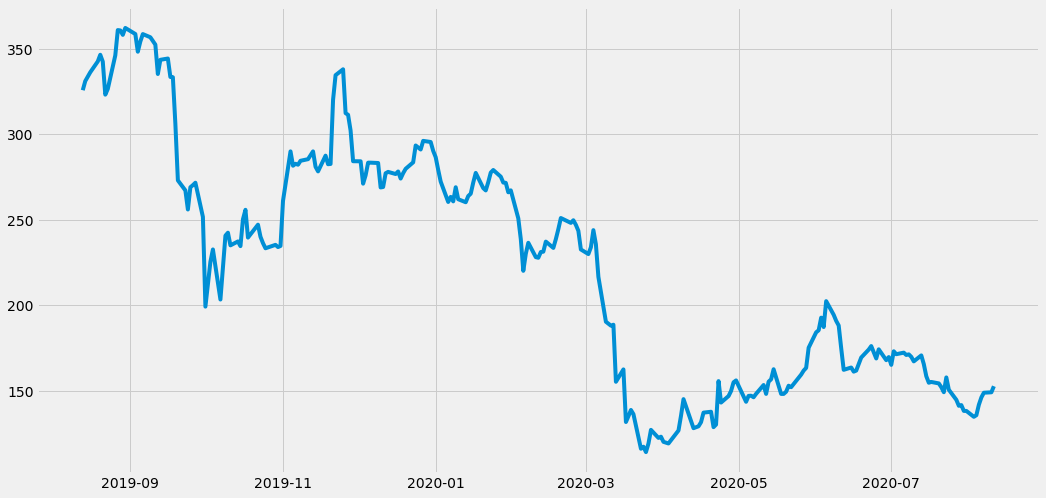

In [197]:


#plot
plt.figure(figsize=(16,8))
plt.plot(df['Low'], label='Low Price history')

In [198]:
print(df.head())
print(df.shape)
print(df.columns)

                 Date        Open        High  ...       Close   Adj Close   Volume
Date                                           ...                                 
2019-08-13 2019-08-13  328.700012  337.500000  ...  327.299988  327.299988  8077371
2019-08-14 2019-08-14  331.149994  346.899994  ...  341.600006  341.600006  8277699
2019-08-16 2019-08-16  343.700012  347.799988  ...  346.600006  346.600006  5719534
2019-08-19 2019-08-19  345.549988  351.850006  ...  348.049988  348.049988  6986559
2019-08-20 2019-08-20  349.500000  354.850006  ...  350.850006  350.850006  5975057

[5 rows x 7 columns]
(244, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


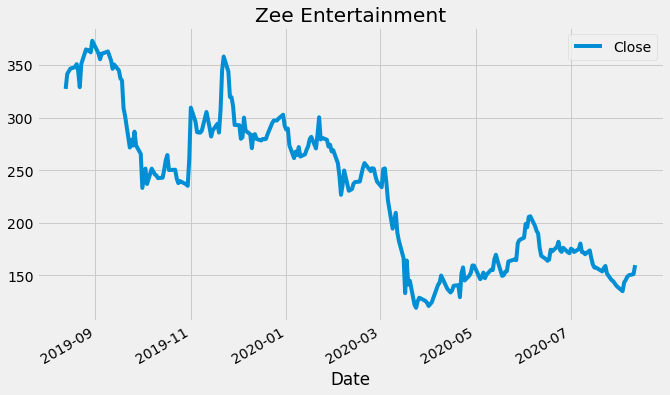

In [199]:
df[['Close']].plot()
plt.title("Zee Entertainment")
plt.show()


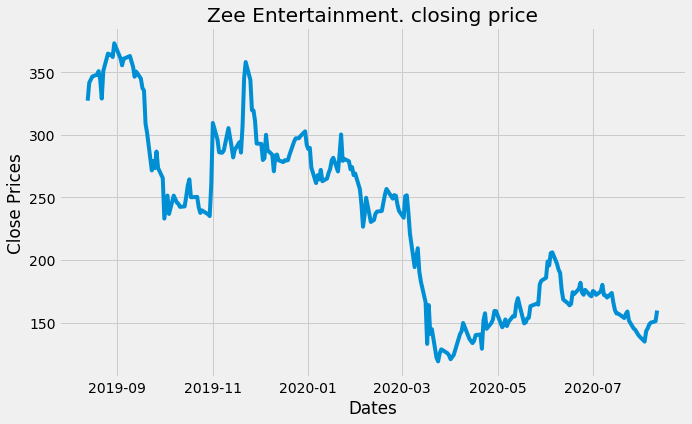

In [200]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('Zee Entertainment. closing price')
plt.show()


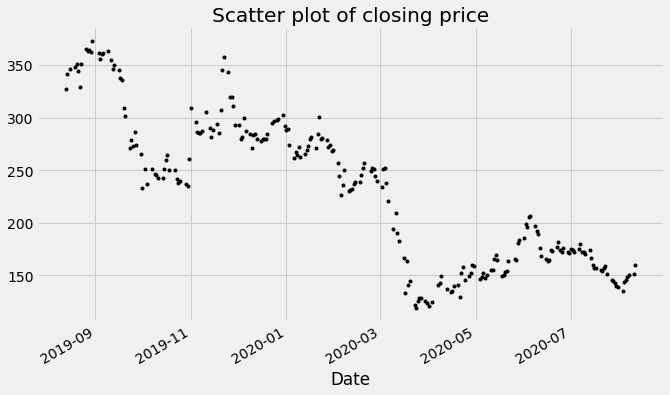

In [201]:
df_close = df['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()


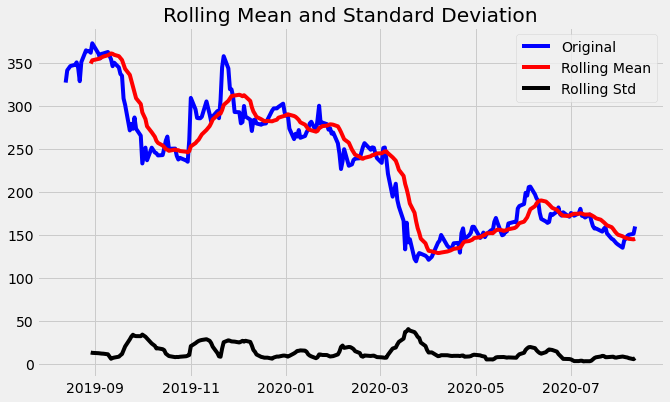

Results of dickey fuller test
Test Statistics                 -1.364114
p-value                          0.599354
No. of lags used                 0.000000
Number of observations used    243.000000
critical value (1%)             -3.457551
critical value (5%)             -2.873509
critical value (10%)            -2.573148
dtype: float64


In [202]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)


<Figure size 720x432 with 0 Axes>

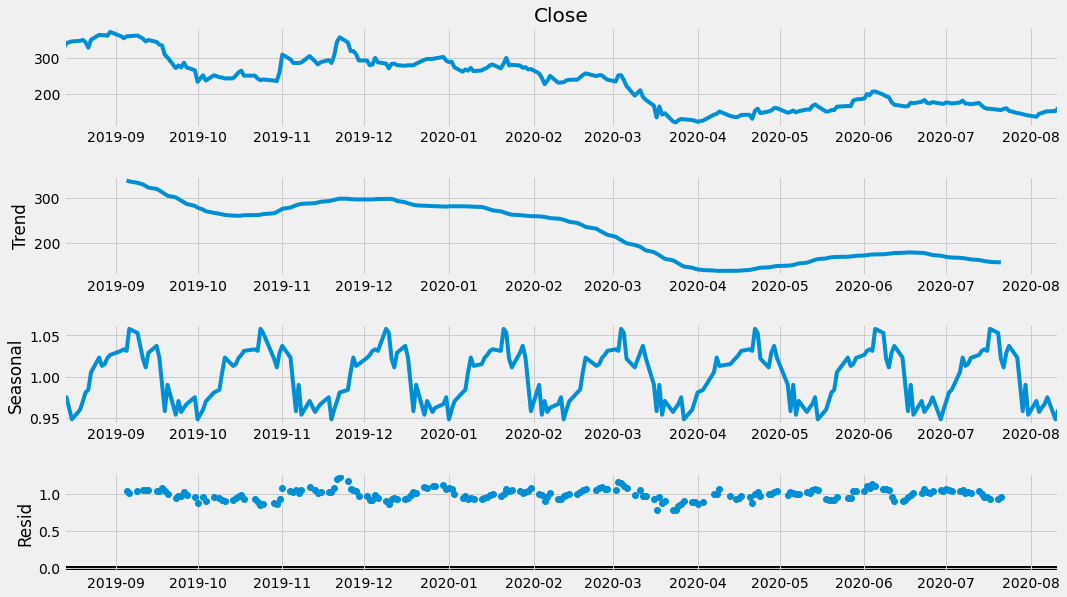

In [203]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


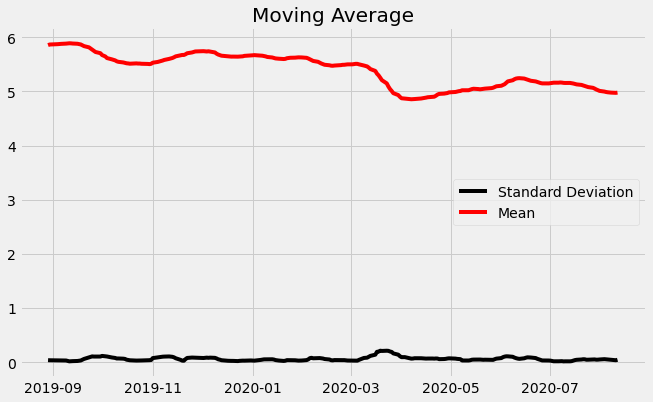

In [204]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


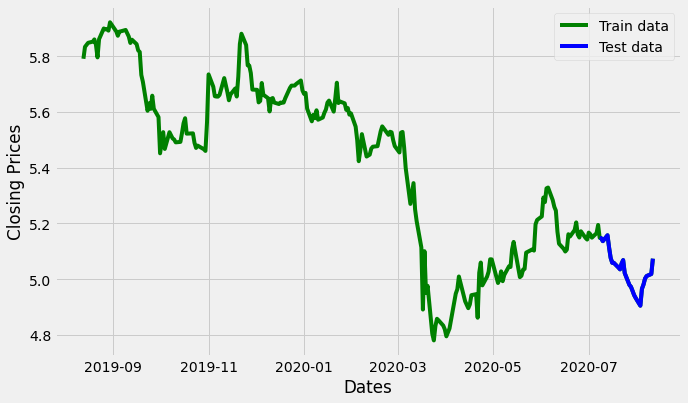

In [205]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


In [206]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-661.916, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-662.025, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-661.880, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-663.156, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-660.386, Time=0.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.660 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  216
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 332.578
Date:                Wed, 12 Aug 2020   AIC                           -663.156
Time:                        11:23:40   BIC                           -659.785
Sample:                             0   HQIC                          -661.794
                                - 216                                       

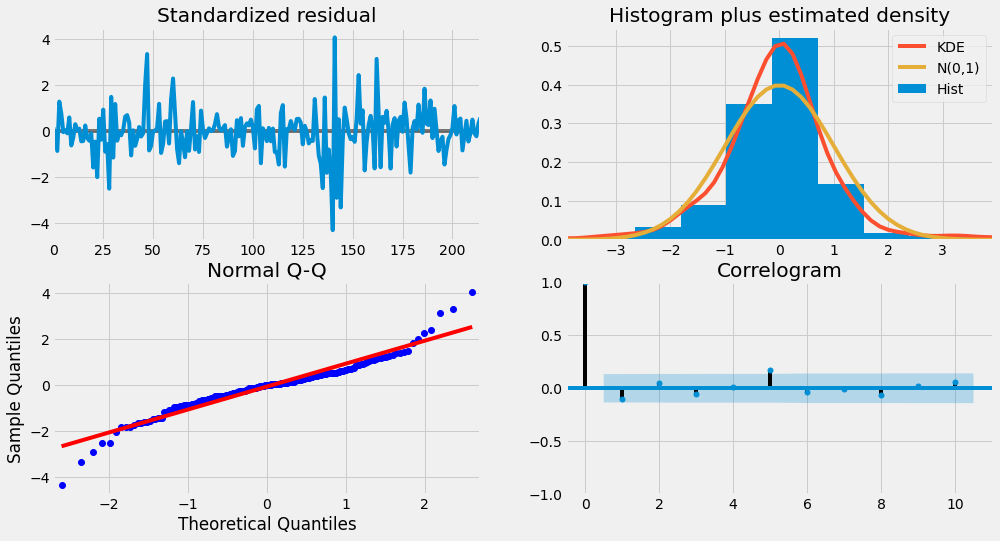

In [207]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


To interpret the plot diagnosis

Top Left:
the residual errors seem to fluctuate around a mean of zero ad have a uniform variance

Top Right:
the density plot suggest normal distribution with mean zero

Bottom left:
all the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed

Bottom Right:
the correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual erros which are not explained in the model.

In [208]:
model = ARIMA(train_data, order=(0, 1, 3))  
fitted = model.fit(disp=-1)  
print(fitted.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  215
Model:                 ARIMA(0, 1, 3)   Log Likelihood                 334.465
Method:                       css-mle   S.D. of innovations              0.051
Date:                Wed, 12 Aug 2020   AIC                           -658.930
Time:                        11:23:41   BIC                           -642.077
Sample:                             1   HQIC                          -652.120
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0031      0.003     -0.972      0.331      -0.009       0.003
ma.L1.D.Close    -0.0873      0.067     -1.295      0.195      -0.219       0.045
ma.L2.D.Close     0.0587      0.070     

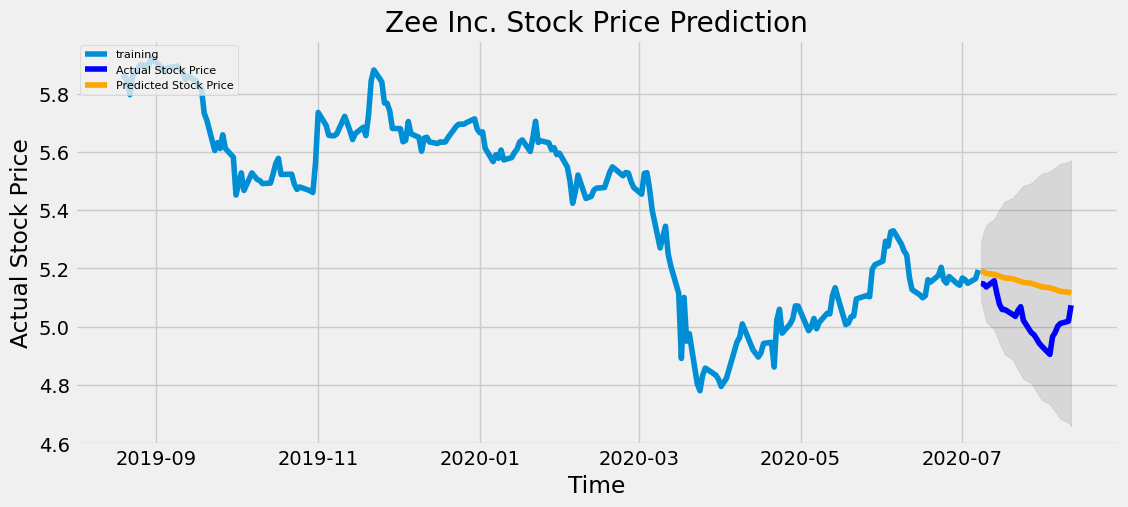

In [210]:
# Forecast
fc, se, conf = fitted.forecast(25, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Zee Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [211]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.016902616136588385
MAE: 0.11766366348799213
RMSE: 0.13001006167442727
MAPE: 0.023522011685072963


Now the MAPE(Mean Absolute Percentage Error) is 2.4% implies the model is 97.6% accurate in predicting the set of observations

---



---





---

#Adani Ports

---



In [212]:
df_adani=pd.read_csv("/content/ADANIPORTS.NS.csv")


In [213]:
df_adani

,Date,Open,High,Low,Close,Adj Close,Volume
0,13-08-2019,376.399994,379.549988,359.100006,360.549988,356.608887,2576776
1,14-08-2019,361.549988,363.000000,356.600006,358.850006,354.927490,4506969
2,16-08-2019,356.049988,358.549988,350.000000,357.350006,353.443878,4433448
3,19-08-2019,357.600006,363.399994,356.500000,357.399994,353.493317,2152462
4,20-08-2019,357.399994,359.750000,352.000000,354.950012,351.070099,1767899
...,...,...,...,...,...,...,...
239,05-08-2020,316.399994,328.799988,313.399994,327.100006,327.100006,8387003
240,06-08-2020,330.100006,330.899994,321.399994,323.799988,323.799988,3281920
241,07-08-2020,323.899994,328.350006,321.549988,326.649994,326.649994,2634656
242,10-08-2020,329.000000,333.950012,325.700012,331.299988,331.299988,3187734


In [214]:
df_adani.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       244 non-null    object 
 1   Open       244 non-null    float64
 2   High       244 non-null    float64
 3   Low        244 non-null    float64
 4   Close      244 non-null    float64
 5   Adj Close  244 non-null    float64
 6   Volume     244 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


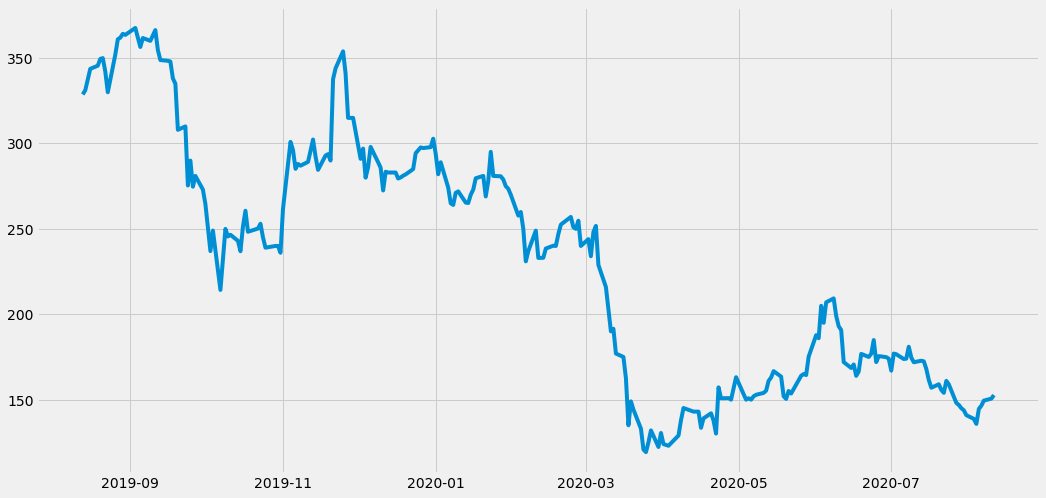

In [215]:
#setting index as date
df_adani['Date'] = pd.to_datetime(df_adani.Date,format='%d-%m-%Y')
df.index = df_adani['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Open'], label='open Price history')

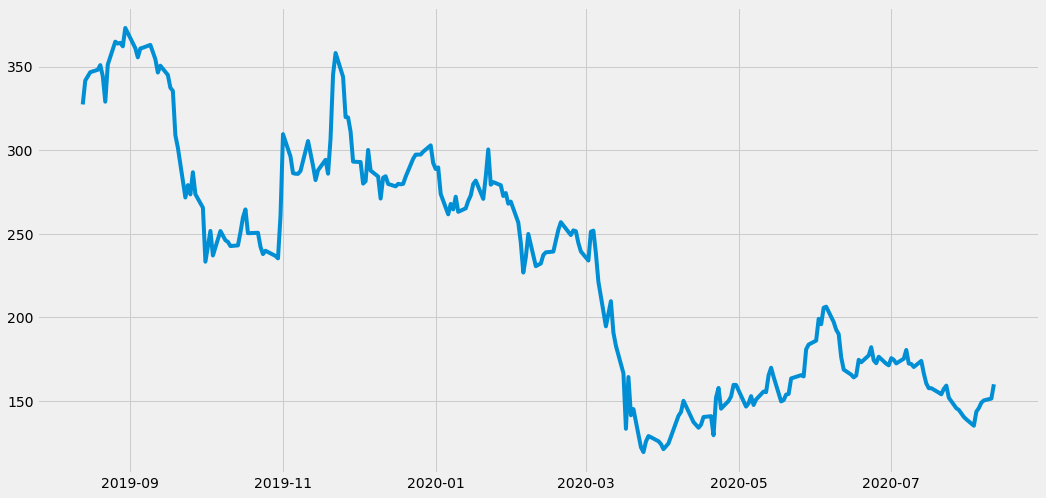

In [216]:
#plot close price

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

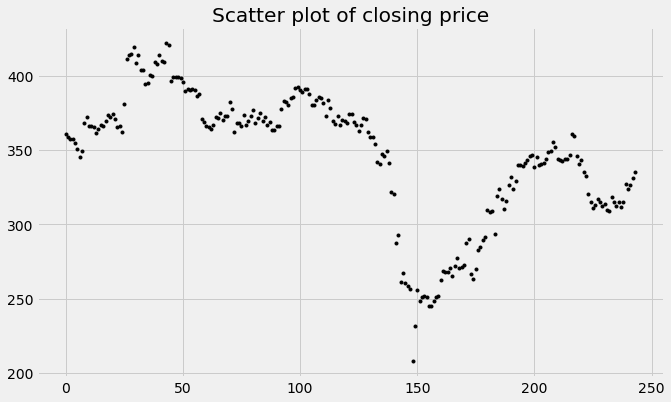

In [217]:
df_close = df_adani['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

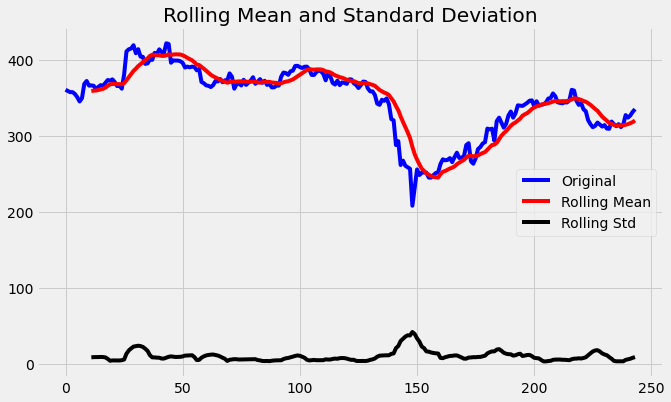

Results of dickey fuller test
Test Statistics                 -1.434455
p-value                          0.565651
No. of lags used                 0.000000
Number of observations used    243.000000
critical value (1%)             -3.457551
critical value (5%)             -2.873509
critical value (10%)            -2.573148
dtype: float64


In [218]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)


In [219]:
df_adani

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-13,376.399994,379.549988,359.100006,360.549988,356.608887,2576776
1,2019-08-14,361.549988,363.000000,356.600006,358.850006,354.927490,4506969
2,2019-08-16,356.049988,358.549988,350.000000,357.350006,353.443878,4433448
3,2019-08-19,357.600006,363.399994,356.500000,357.399994,353.493317,2152462
4,2019-08-20,357.399994,359.750000,352.000000,354.950012,351.070099,1767899
...,...,...,...,...,...,...,...
239,2020-08-05,316.399994,328.799988,313.399994,327.100006,327.100006,8387003
240,2020-08-06,330.100006,330.899994,321.399994,323.799988,323.799988,3281920
241,2020-08-07,323.899994,328.350006,321.549988,326.649994,326.649994,2634656
242,2020-08-10,329.000000,333.950012,325.700012,331.299988,331.299988,3187734


<Figure size 720x432 with 0 Axes>

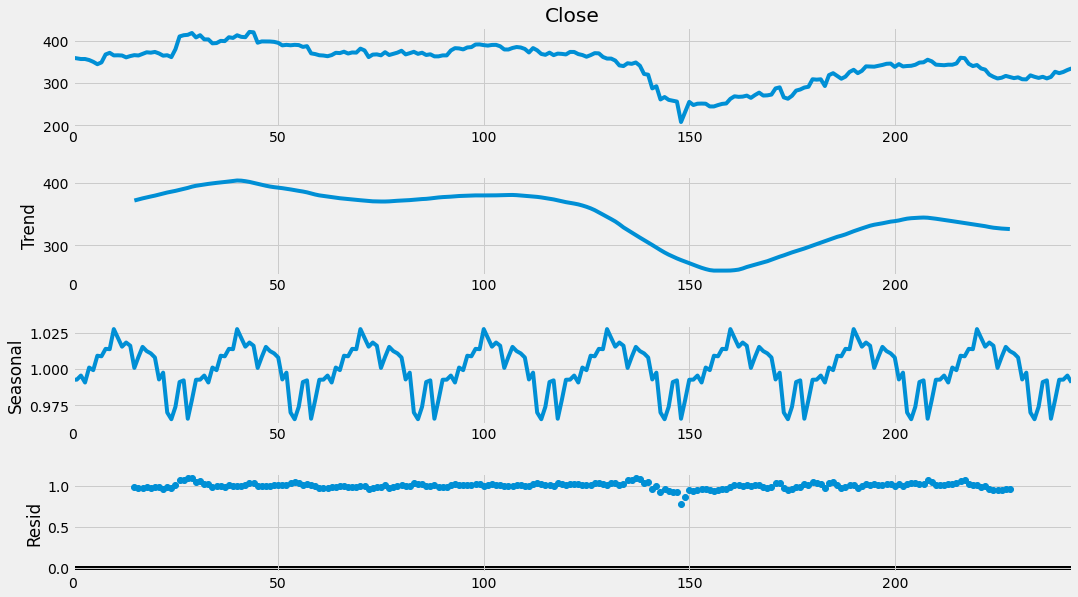

In [220]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)


No handles with labels found to put in legend.


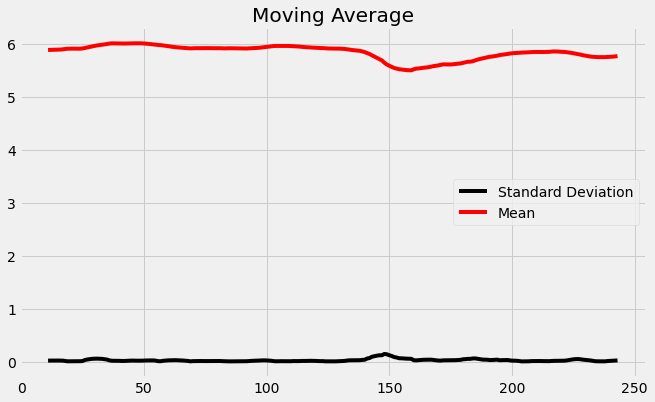

In [221]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


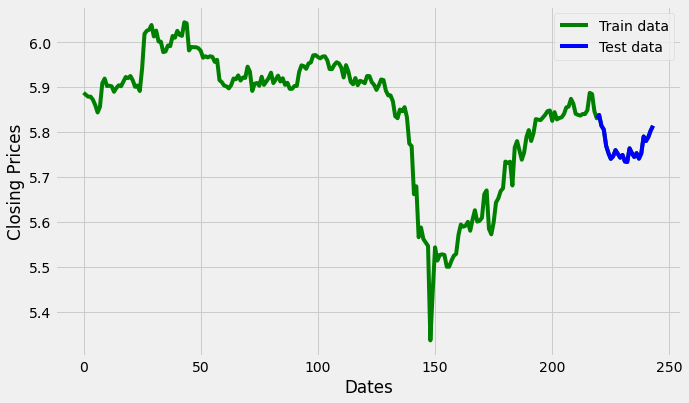

In [222]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


Auto ARIMA: Automatically discover the optimal order for an ARIMA model.

The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. This function is based on the commonly-used R function, forecast::auto.arima.

The auro_arima function works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto_arima also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

In [223]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-913.364, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-913.172, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-913.591, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-915.358, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-912.201, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.786 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  216
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 458.679
Date:                Wed, 12 Aug 2020   AIC                           -915.358
Time:                        11:29:37   BIC                           -911.988
Sample:                             0   HQIC                          -913.996
                                - 216                                       

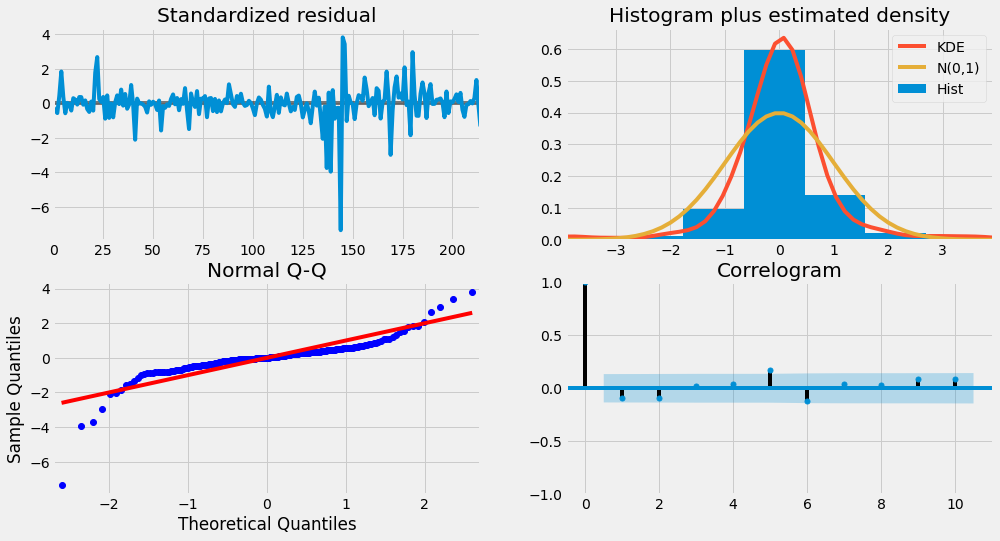

In [224]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


To interpret the plot diagnosis

Top Left:
the residual errors seem to fluctuate around a mean of zero ad have a uniform variance

Top Right:
the density plot suggest normal distribution with mean zero

Bottom left:
all the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed

Bottom Right:
the correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual erros which are not explained in the model.

In [225]:
model = ARIMA(train_data, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  215
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 458.682
Method:                           css   S.D. of innovations              0.029
Date:                Wed, 12 Aug 2020   AIC                           -913.364
Time:                        11:30:05   BIC                           -906.623
Sample:                             1   HQIC                          -910.640
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.002     -0.077      0.938      -0.004       0.004


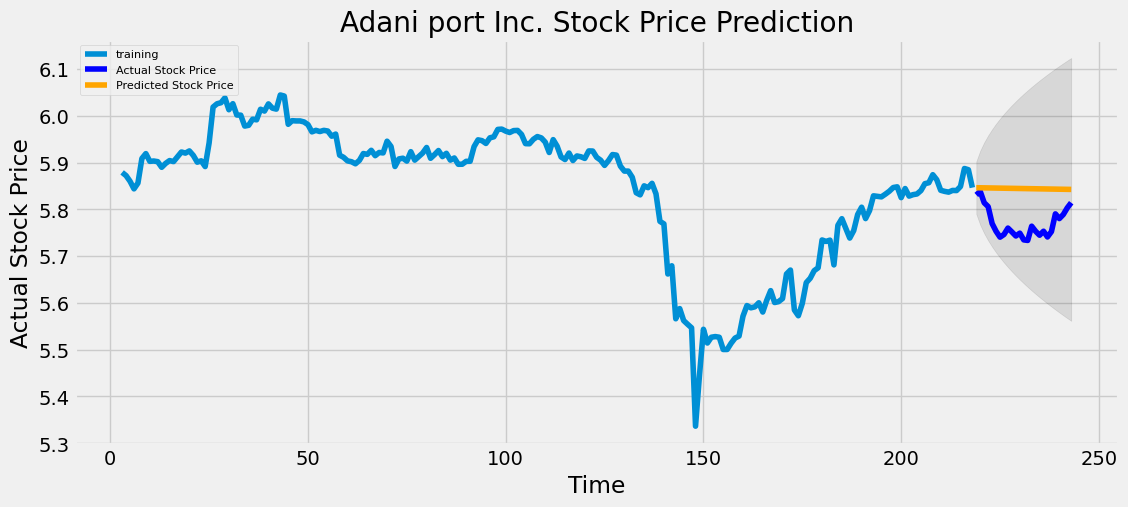

In [226]:
# Forecast
fc, se, conf = fitted.forecast(25, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Adani port Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [227]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.0064412544151178554
MAE: 0.07416144234747904
RMSE: 0.08025742591883854
MAPE: 0.012881223035964706


Now the MAPE(Mean Absolute Percentage Error) is 1.3% implies the model is 98.7% accurate in predicting the set of observations

#Kotak Mahindra Bank

In [229]:
df_kotak=pd.read_csv('/content/KOTAKBANK.NS (1).csv')

In [230]:
df_kotak

,Date,Open,High,Low,Close,Adj Close,Volume
0,13-08-2019,1525.099976,1534.000000,1505.250000,1511.400024,1511.400024,2765975
1,14-08-2019,1515.000000,1515.400024,1479.449951,1491.800049,1491.800049,2354908
2,16-08-2019,1489.000000,1506.500000,1477.500000,1498.949951,1498.949951,2169754
3,19-08-2019,1505.000000,1519.500000,1490.550049,1496.349976,1496.349976,1547598
4,20-08-2019,1490.550049,1511.250000,1482.650024,1505.099976,1505.099976,1724609
...,...,...,...,...,...,...,...
240,06-08-2020,1345.000000,1367.400024,1330.650024,1340.099976,1340.099976,3677830
241,07-08-2020,1341.500000,1347.800049,1323.250000,1342.500000,1342.500000,2807069
242,10-08-2020,1349.000000,1380.000000,1346.199951,1360.199951,1360.199951,2960056
243,11-08-2020,1373.000000,1385.000000,1357.150024,1364.599976,1364.599976,2502925


In [231]:
df_kotak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       245 non-null    object 
 1   Open       245 non-null    float64
 2   High       245 non-null    float64
 3   Low        245 non-null    float64
 4   Close      245 non-null    float64
 5   Adj Close  245 non-null    float64
 6   Volume     245 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


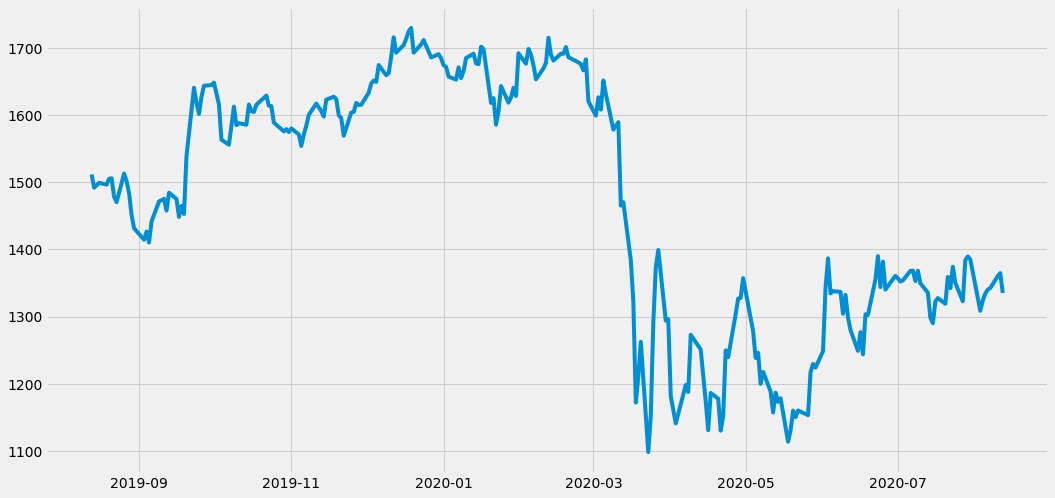

In [233]:
#setting index as date
df_kotak['Date'] = pd.to_datetime(df_kotak.Date,format='%d-%m-%Y')
df_kotak.index = df_kotak['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df_kotak['Close'], label='Close Price history')

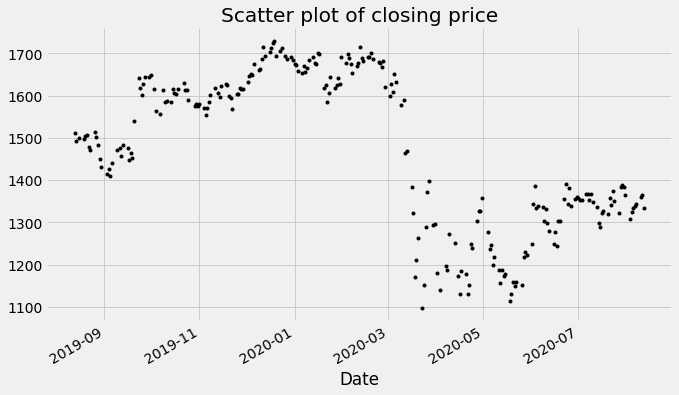

In [234]:
df_close = df_kotak['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()


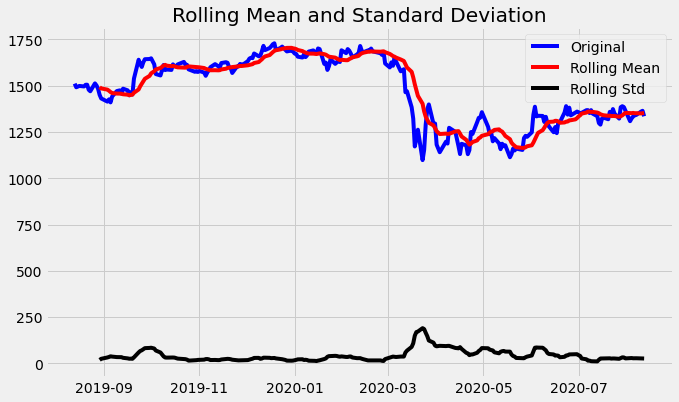

Results of dickey fuller test
Test Statistics                 -1.516532
p-value                          0.525318
No. of lags used                 0.000000
Number of observations used    244.000000
critical value (1%)             -3.457438
critical value (5%)             -2.873459
critical value (10%)            -2.573122
dtype: float64


In [235]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)


<Figure size 720x432 with 0 Axes>

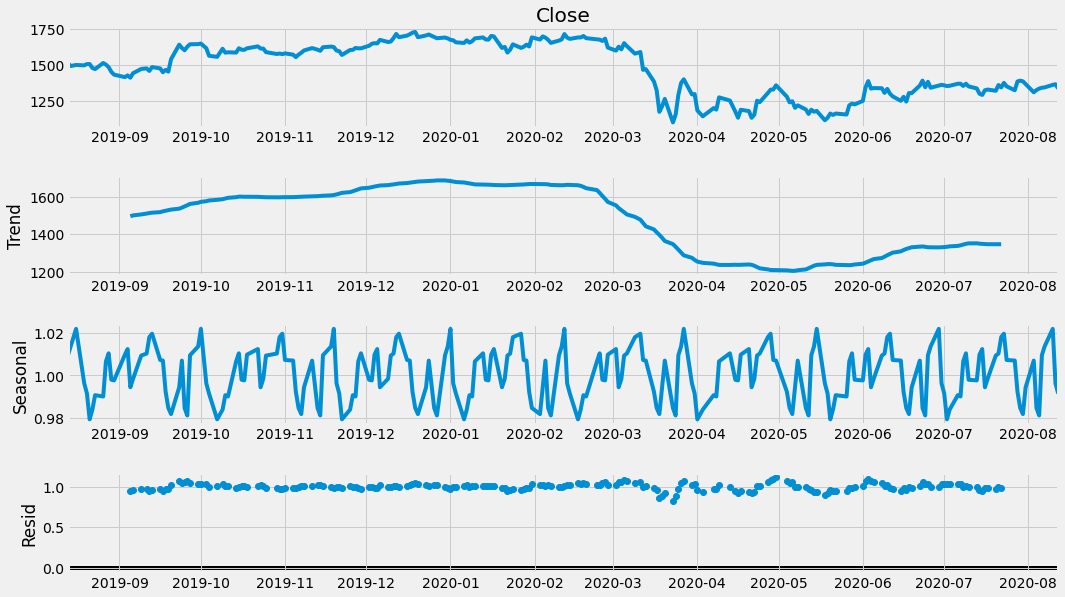

In [236]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)


we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

No handles with labels found to put in legend.


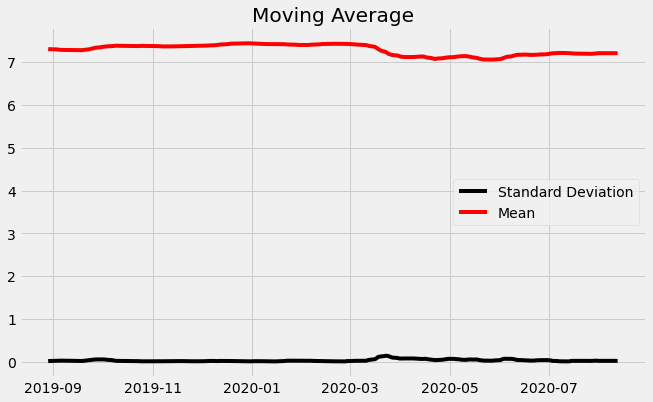

In [237]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


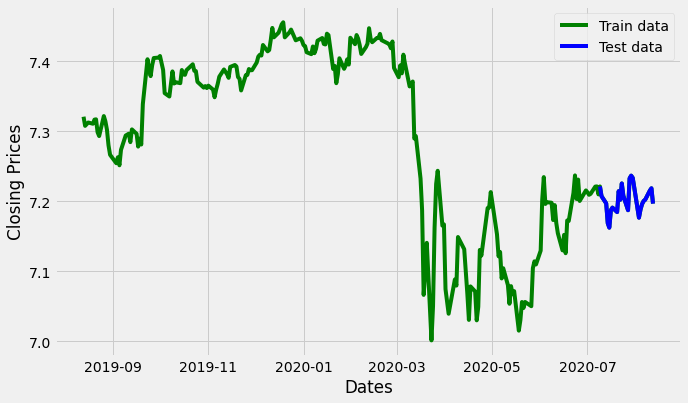

In [238]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


Auto ARIMA: Automatically discover the optimal order for an ARIMA model.

The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. 
This function is based on the commonly-used R function, forecast::auto.arima.

The auro_arima function works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. 
If the seasonal optional is enabled, auto_arima also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

In [239]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-915.179, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-913.182, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-913.182, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-917.123, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-914.542, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.556 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  217
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 459.561
Date:                Wed, 12 Aug 2020   AIC                           -917.123
Time:                        11:37:43   BIC                           -913.747
Sample:                             0   HQIC                          -915.759
                                - 217                                       

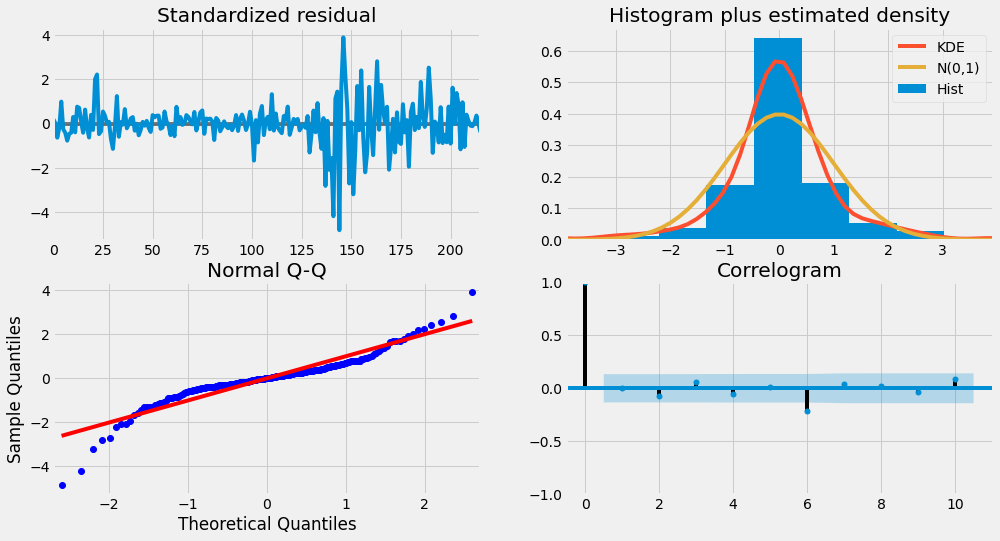

In [240]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


To interpret the plot diagnosis
#Top Left: 
the residual errors seem to fluctuate around a mean of zero ad have a uniform variance
#Top Right:
the density plot suggest normal distribution with mean zero
#Bottom left:
all the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed
#Bottom Right:
the correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual erros which are not explained in the model.


In [241]:
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  216
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 462.411
Method:                       css-mle   S.D. of innovations              0.028
Date:                Wed, 12 Aug 2020   AIC                           -910.823
Time:                        11:38:25   BIC                           -887.196
Sample:                             1   HQIC                          -901.278
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0005      0.001     -0.326      0.744      -0.003       0.002
ar.L1.D.Close     0.1097      0.246      0.446      0.655      -0.372       0.592
ar.L2.D.Close     0.5956      0.208     

Were gonna forecast the stock prices on the test dataset keeping 95% coonfidence level

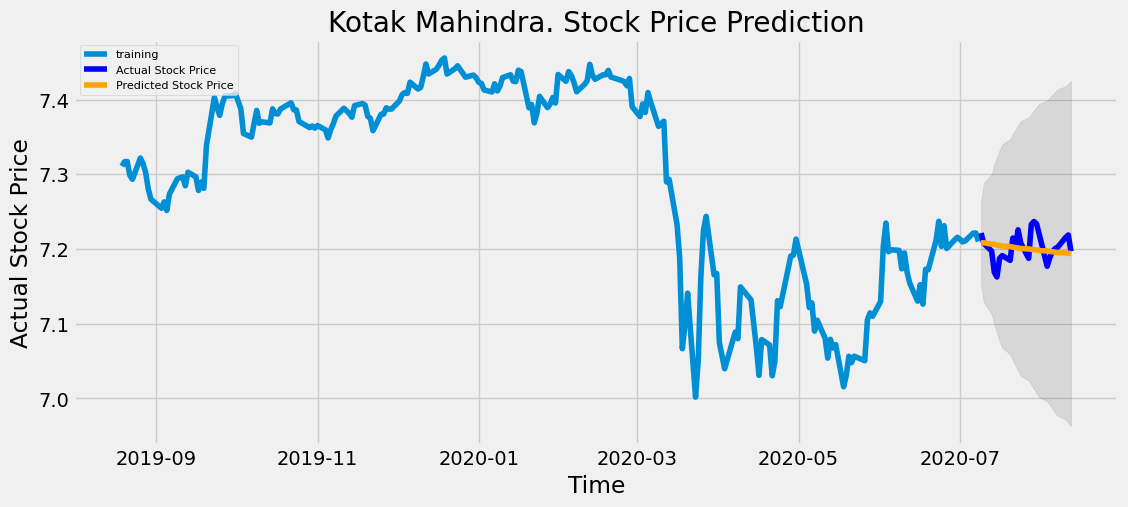

In [242]:
#Forecast
fc, se, conf = fitted.forecast(25, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Kotak Mahindra. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [243]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.0004437357973732145
MAE: 0.017046736545587783
RMSE: 0.021065037321904144
MAPE: 0.0023661886330705122


Now the MAPE(Mean Absolute Percentage Error)is 0.2% implies the model is 99.98% accurate in predicting the set of observations 

## Here we'l try the data which is from 2015 to 2020

for all the three companies to read the difference it may cause!

#Kotak Mahindra Bank

In [244]:
df=pd.read_csv("/content/KOTAKBANK.NS.csv")

In [245]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-08-2015,702.950012,704.250000,682.549988,686.150024,684.559631,786631
1,13-08-2015,688.000000,695.000000,683.099976,690.750000,689.148926,592486
2,14-08-2015,692.500000,719.500000,692.000000,717.700012,716.036438,822516
3,17-08-2015,718.799988,724.750000,705.500000,719.799988,718.131653,762387
4,18-08-2015,719.849976,721.599976,699.000000,705.099976,703.465576,473957
...,...,...,...,...,...,...,...
1223,05-08-2020,1332.000000,1353.000000,1322.000000,1334.199951,1334.199951,3475602
1224,06-08-2020,1345.000000,1367.400024,1330.650024,1340.099976,1340.099976,3677830
1225,07-08-2020,1341.500000,1347.800049,1323.250000,1342.500000,1342.500000,2807069
1226,10-08-2020,1349.000000,1380.000000,1346.199951,1360.199951,1360.199951,2960056


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1228 non-null   float64
 2   High       1228 non-null   float64
 3   Low        1228 non-null   float64
 4   Close      1228 non-null   float64
 5   Adj Close  1228 non-null   float64
 6   Volume     1228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.3+ KB


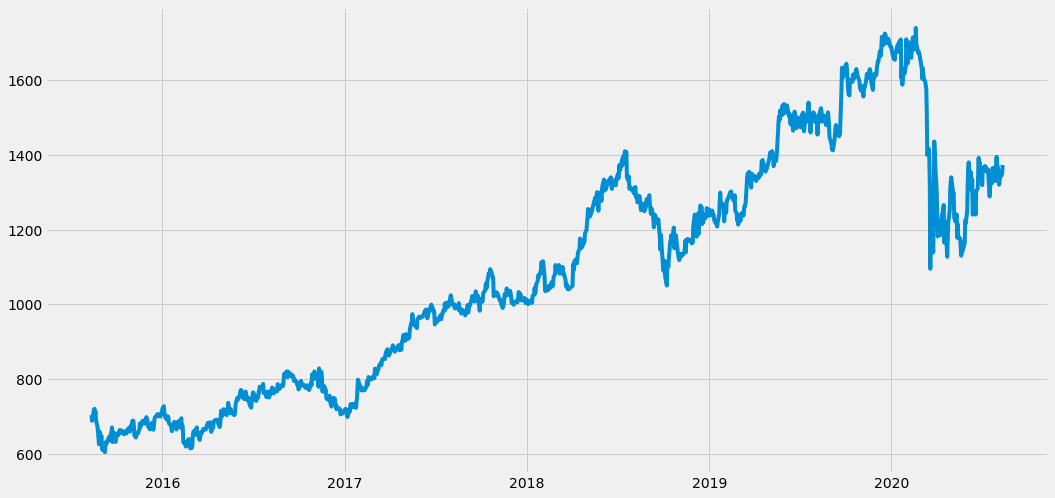

In [247]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Open'], label='open Price history')

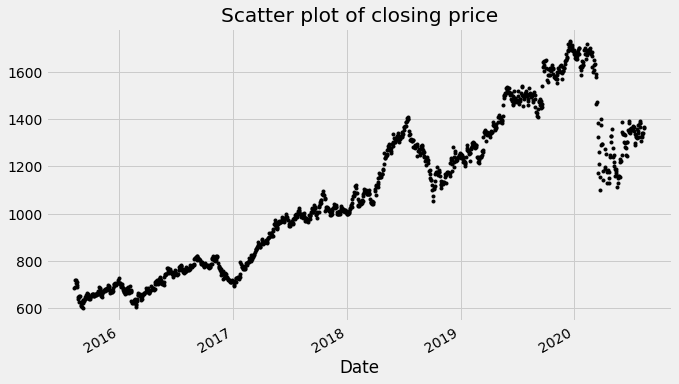

In [248]:
df_close = df['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

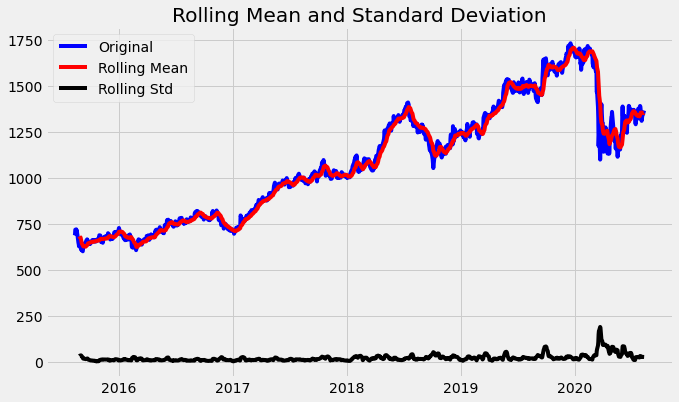

Results of dickey fuller test
Test Statistics                  -1.279772
p-value                           0.638375
No. of lags used                 12.000000
Number of observations used    1215.000000
critical value (1%)              -3.435744
critical value (5%)              -2.863922
critical value (10%)             -2.568038
dtype: float64


In [249]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)


<Figure size 720x432 with 0 Axes>

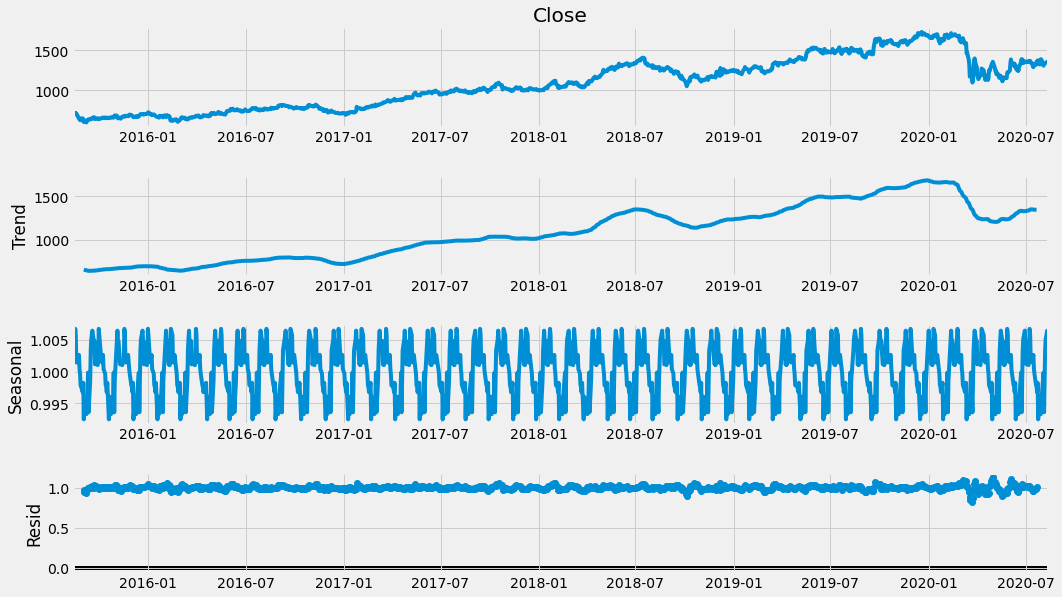

In [250]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)


we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, 
we find the rolling average of the series. 

A rolling average is calculated by taking input for the past 5 years and giving a mean consumption value at every point further ahead in series.

No handles with labels found to put in legend.


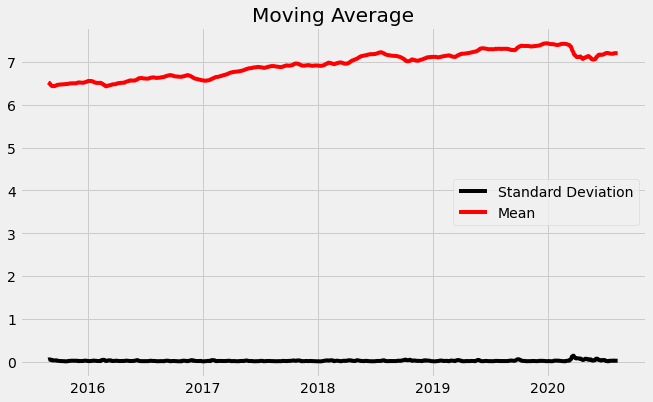

In [251]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us split the data into training and test set and visualize it.

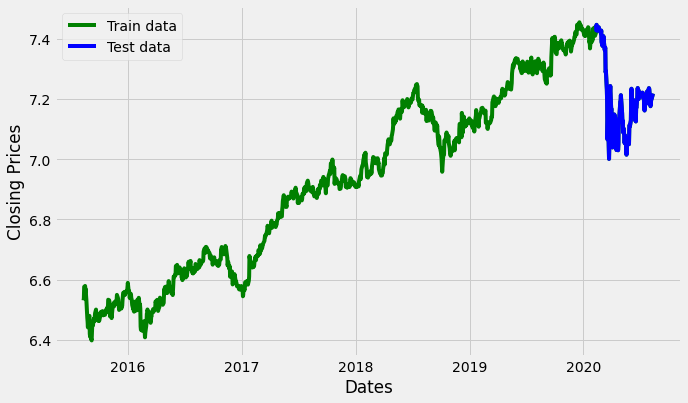

In [252]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


In [253]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7395.092, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-6255.685, Time=0.67 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.70 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-6254.931, Time=0.82 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=1.38 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-6240.199, Time=1.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6259.554, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-988.324, Time=0.49 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-6257.538, Time=1.17 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-6258.853, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=461.092, Time=0

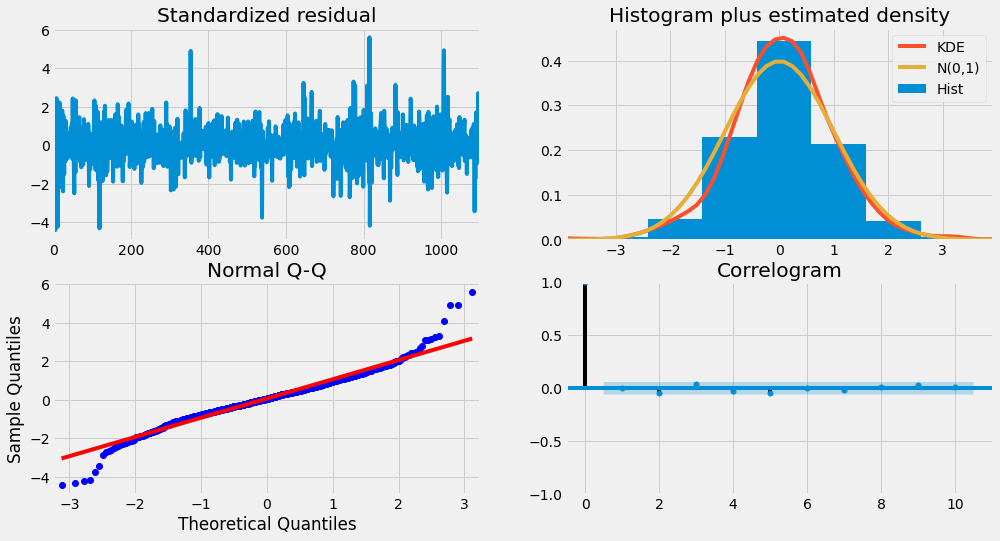

In [254]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [255]:
model = ARIMA(train_data, order=(1, 0, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1102
Model:                     ARMA(1, 1)   Log Likelihood                3133.855
Method:                       css-mle   S.D. of innovations              0.014
Date:                Wed, 12 Aug 2020   AIC                          -6259.711
Time:                        11:44:54   BIC                          -6239.691
Sample:                             0   HQIC                         -6252.138
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.9798      0.332     20.998      0.000       6.328       7.631
ar.L1.Close     0.9994      0.001   1463.992      0.000       0.998       1.001
ma.L1.Close    -0.0867      0.031     -2.790    

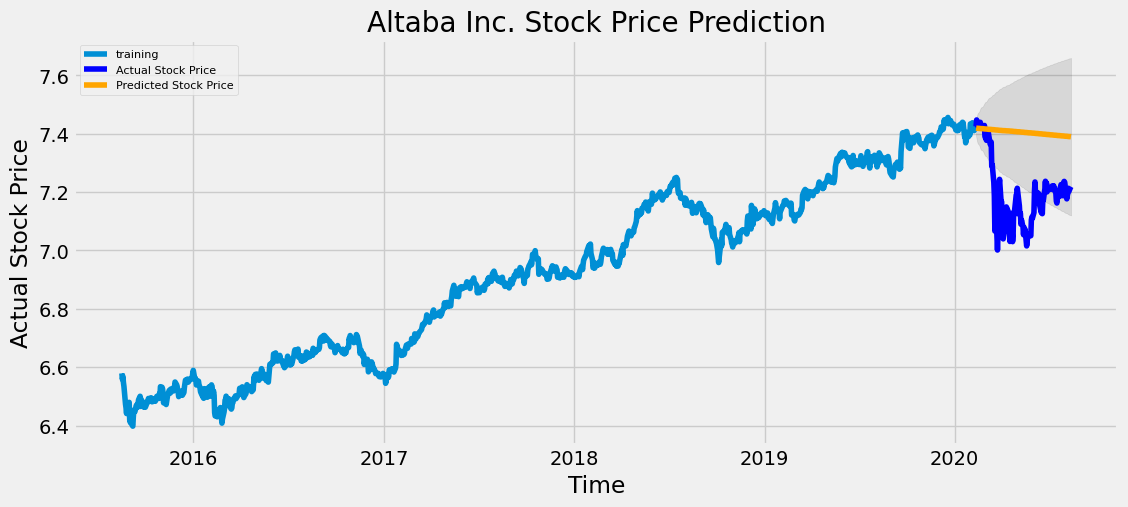

In [256]:
# Forecast
fc, se, conf = fitted.forecast(123, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


As you can see our model did quite handsomely. Let us also check the commonly used accuracy metrics to judge forecast results:


In [257]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.054965396345179586
MAE: 0.20915380227798916
RMSE: 0.2344470011434985
MAPE: 0.029294356959770704


Around 2.9% MAPE(Mean Absolute Percentage Error) implies the model is about 97.1% accurate in predicting the test set observations.

---



---



#Adani ports

In [258]:
df1=pd.read_csv('/content/ADANIPORTS.NS (1).csv')

In [259]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-08-2015,331.799988,331.799988,331.799988,331.799988,323.816040,0
1,13-08-2015,328.000000,338.000000,328.000000,334.700012,326.646271,4693354
2,14-08-2015,340.000000,365.799988,340.000000,363.750000,354.997223,13845397
3,17-08-2015,364.000000,365.000000,356.600006,358.299988,349.678345,3561590
4,18-08-2015,361.649994,372.799988,361.649994,363.450012,354.704468,4140901
...,...,...,...,...,...,...,...
1223,05-08-2020,316.399994,328.799988,313.399994,327.100006,327.100006,8387003
1224,06-08-2020,330.100006,330.899994,321.399994,323.799988,323.799988,3281920
1225,07-08-2020,323.899994,328.350006,321.549988,326.649994,326.649994,2634656
1226,10-08-2020,329.000000,333.950012,325.700012,331.299988,331.299988,3187734


In [260]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1228 non-null   float64
 2   High       1228 non-null   float64
 3   Low        1228 non-null   float64
 4   Close      1228 non-null   float64
 5   Adj Close  1228 non-null   float64
 6   Volume     1228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.3+ KB


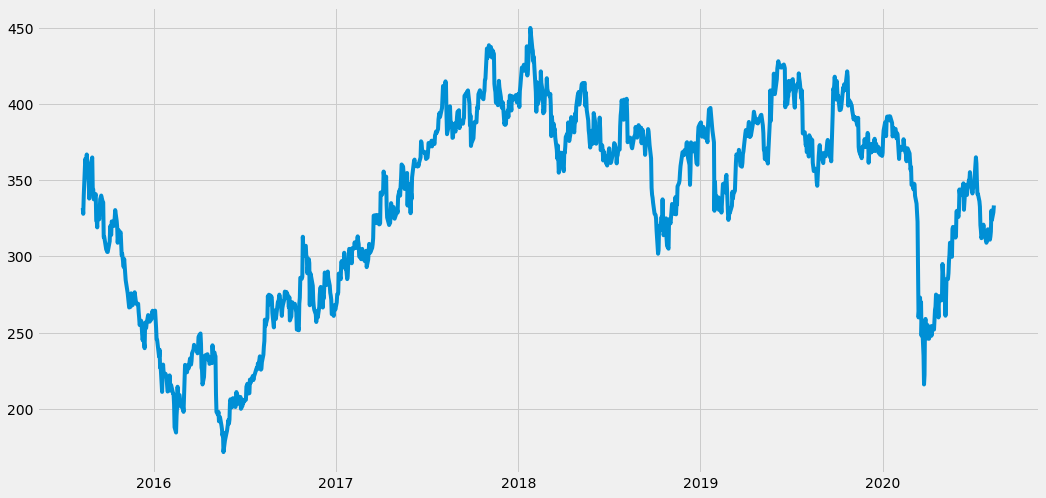

In [261]:
#setting index as date
df1['Date'] = pd.to_datetime(df1.Date,format='%d-%m-%Y')
df1.index = df1['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df1['Open'], label='open Price history')

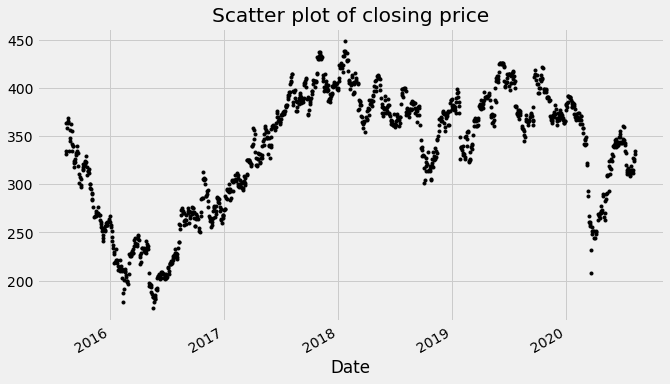

In [262]:
df_close = df1['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()


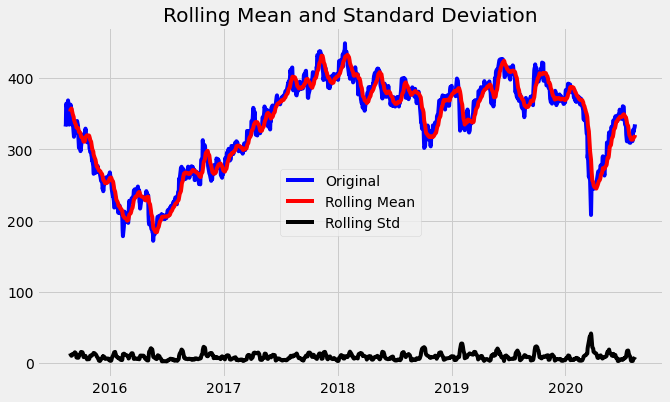

Results of dickey fuller test
Test Statistics                  -1.871690
p-value                           0.345494
No. of lags used                  1.000000
Number of observations used    1226.000000
critical value (1%)              -3.435695
critical value (5%)              -2.863900
critical value (10%)             -2.568027
dtype: float64


In [263]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)


We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.
In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.
So let us separate Trend and Seasonality from the time series.

<Figure size 720x432 with 0 Axes>

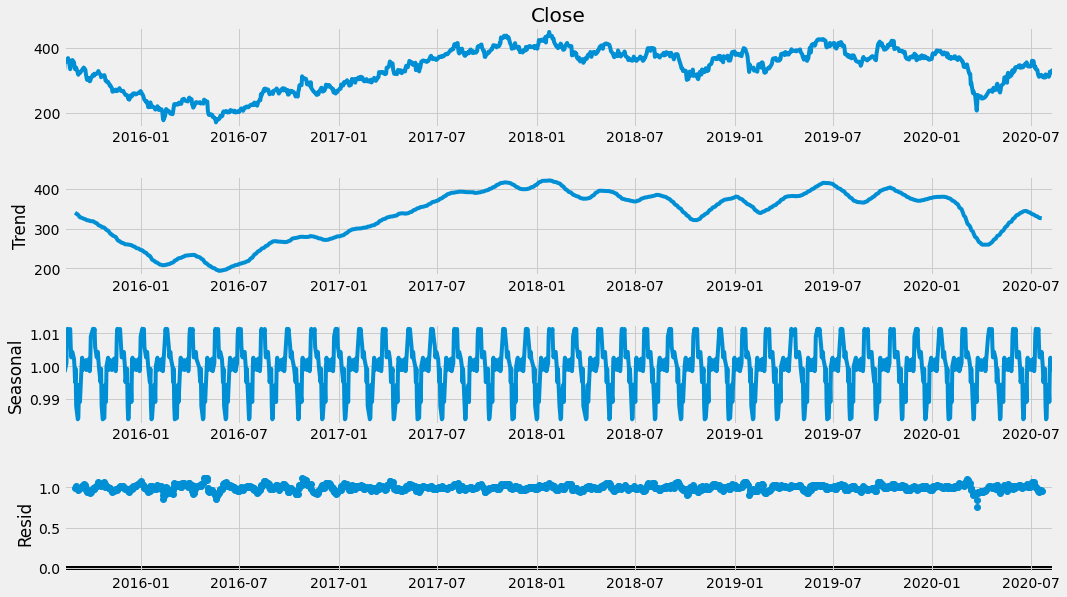

In [264]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)


No handles with labels found to put in legend.


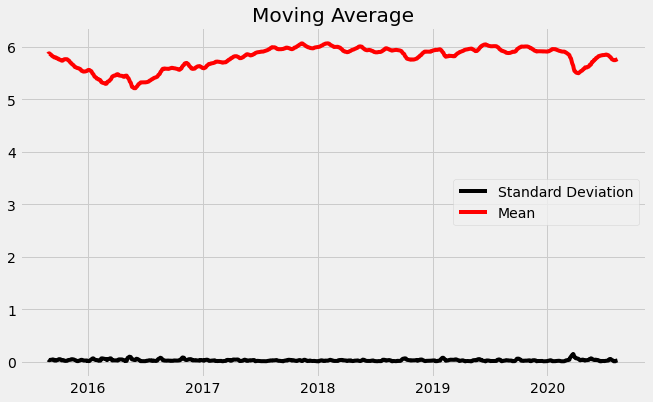

In [266]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


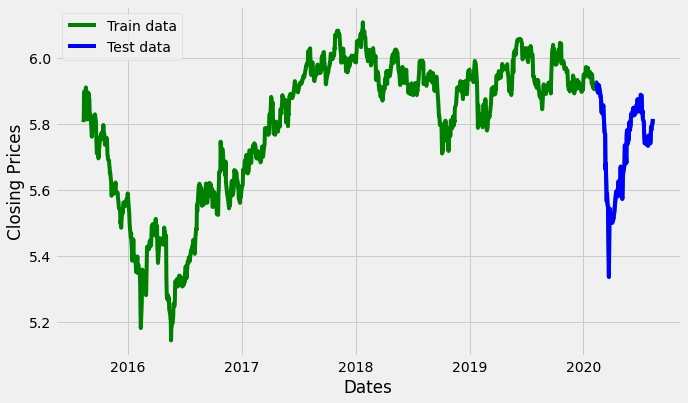

In [267]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


In [268]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5339.858, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5339.454, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5339.414, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5341.857, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5338.123, Time=0.77 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.485 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1102
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2671.928
Date:                Wed, 12 Aug 2020   AIC                          -5341.857
Time:                        11:50:53   BIC                          -5336.853
Sample:                             0   HQIC                         -5339.964
                               - 1102                                  

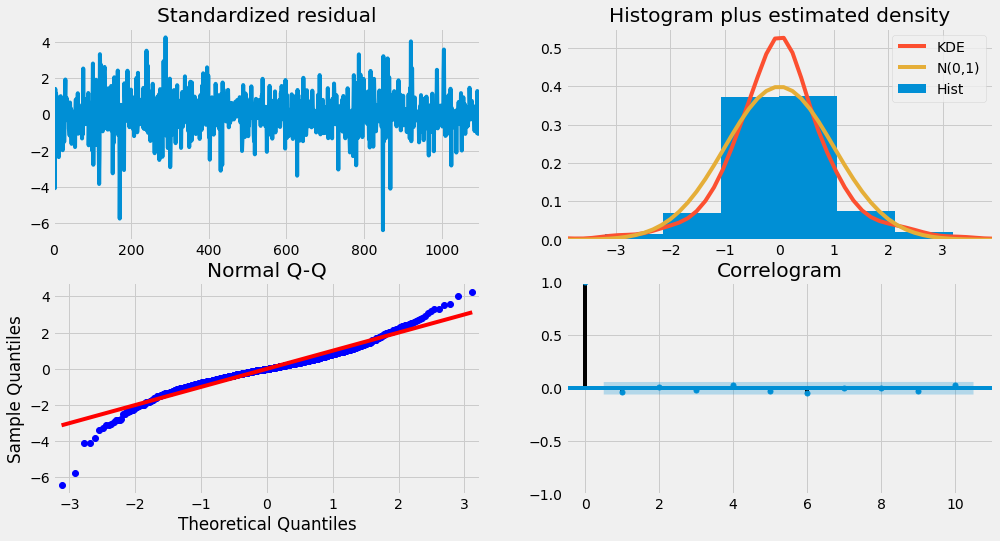

In [269]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [270]:
model = ARIMA(train_data, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1101
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2671.929
Method:                           css   S.D. of innovations              0.021
Date:                Wed, 12 Aug 2020   AIC                          -5339.858
Time:                        11:51:07   BIC                          -5329.850
Sample:                             1   HQIC                         -5336.072
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.488e-05      0.001      0.039      0.969      -0.001       0.001


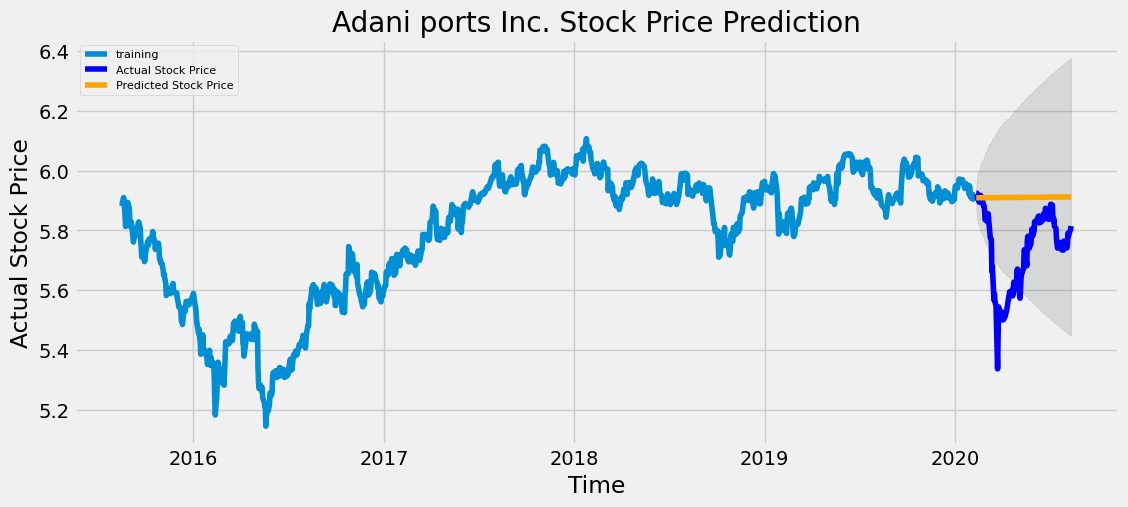

In [271]:
# Forecast
fc, se, conf = fitted.forecast(123, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Adani ports Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [272]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.04523778751253829
MAE: 0.17183587874264641
RMSE: 0.21269176644275228
MAPE: 0.030444893259524757


Around 3.0% MAPE(Mean Absolute Percentage Error) implies the model is about 97.0% accurate in predicting the test set observations.


---



---



---



#Zee Entertainment Enterprises Ltd

In [273]:
df2=pd.read_csv('/content/ZEEL.NS (1).csv')

In [274]:
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-08-2015,413.000000,418.750000,399.649994,401.600006,389.660187,1356894
1,13-08-2015,401.600006,411.000000,399.000000,400.799988,388.883972,1447259
2,14-08-2015,398.000000,421.700012,398.000000,419.799988,407.319061,1674969
3,17-08-2015,415.000000,418.149994,406.200012,409.100006,396.937256,1124164
4,18-08-2015,409.299988,412.299988,404.100006,406.350006,394.268982,1693445
...,...,...,...,...,...,...,...
1223,05-08-2020,144.600006,147.350006,141.699997,145.550003,145.550003,27773529
1224,06-08-2020,146.500000,152.600006,146.000000,148.750000,148.750000,36848744
1225,07-08-2020,149.449997,151.300003,148.750000,150.100006,150.100006,13680936
1226,10-08-2020,150.600006,154.000000,149.000000,151.199997,151.199997,13342848


In [275]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1228 non-null   float64
 2   High       1228 non-null   float64
 3   Low        1228 non-null   float64
 4   Close      1228 non-null   float64
 5   Adj Close  1228 non-null   float64
 6   Volume     1228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.3+ KB


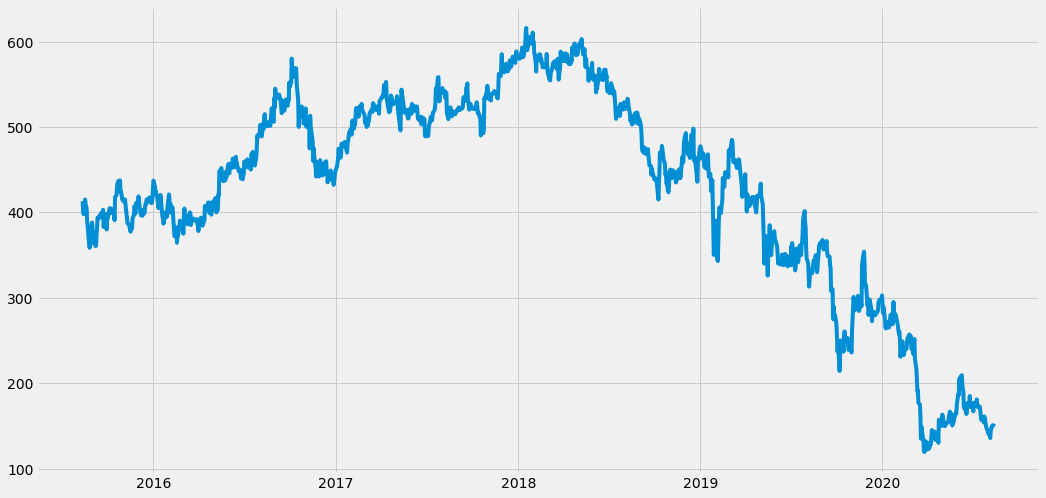

In [276]:
#setting index as date
df2['Date'] = pd.to_datetime(df2.Date,format='%d-%m-%Y')
df2.index = df2['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df2['Open'], label='open Price history')

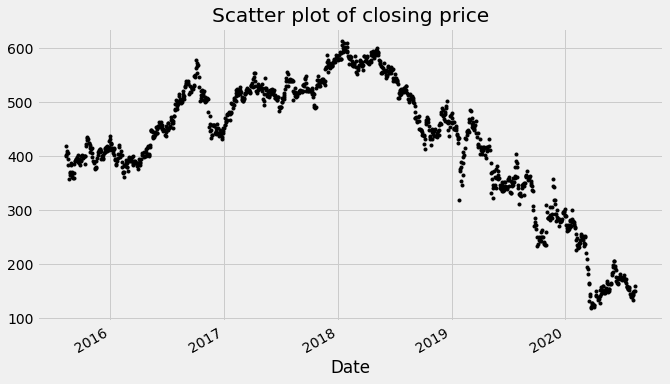

In [277]:
df_close = df2['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()


Also, a given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.
These components are defined as follows:
Level: The average value in the series.
Trend: The increasing or decreasing value in the series.
Seasonality: The repeating short-term cycle in the series.
Noise: The random variation in the series.
First, we need to check if a series is stationary or not because time series analysis only works with stationary data.
ADF (Augmented Dickey-Fuller) Test
The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:
Null Hypothesis: The series has a unit root (value of a =1)
Alternate Hypothesis: The series has no unit root.
If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.
If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.
So let's check for stationarity:

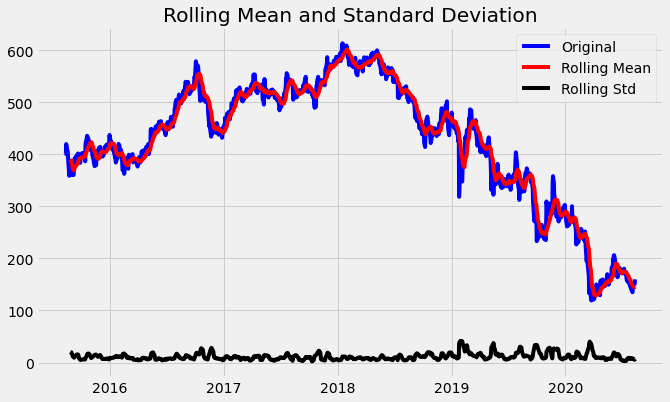

Results of dickey fuller test
Test Statistics                  -0.147576
p-value                           0.944489
No. of lags used                 10.000000
Number of observations used    1217.000000
critical value (1%)              -3.435735
critical value (5%)              -2.863918
critical value (10%)             -2.568036
dtype: float64


In [278]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)


We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.
So let us separate Trend and Seasonality from the time series.


<Figure size 720x432 with 0 Axes>

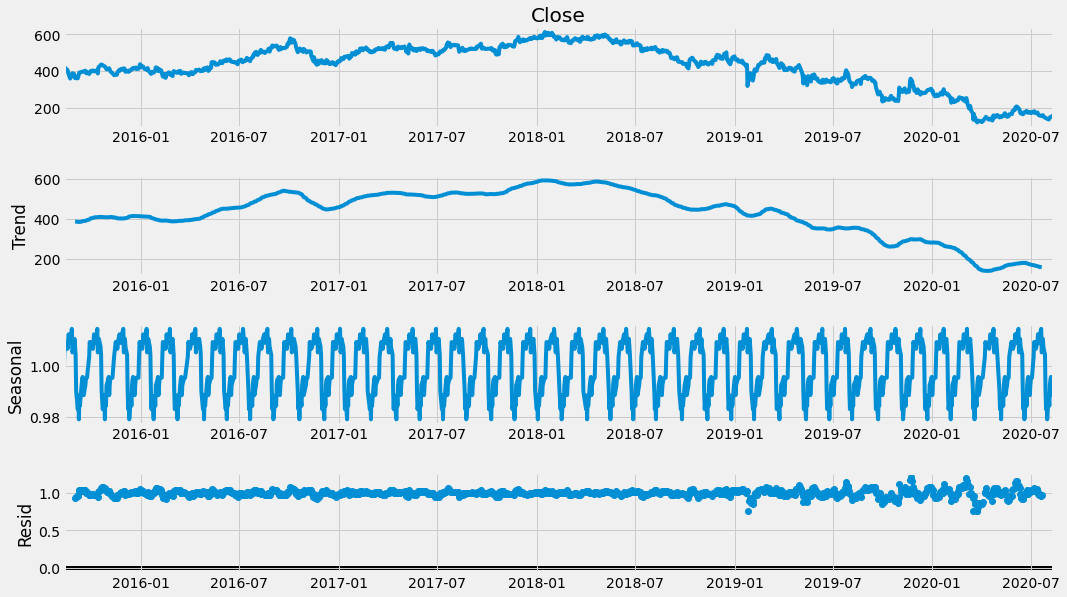

In [279]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)


No handles with labels found to put in legend.


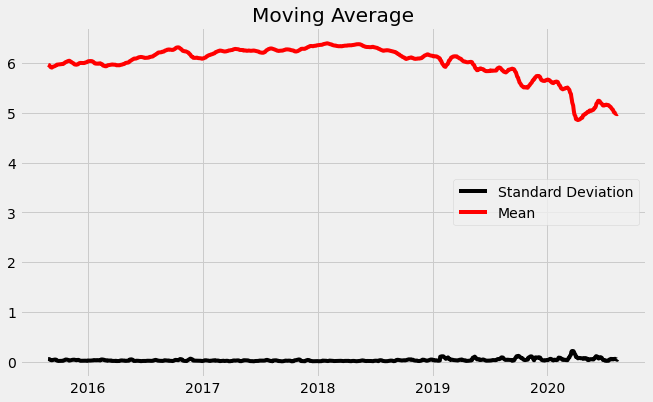

In [280]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us split the data into training and test set and visualize it.


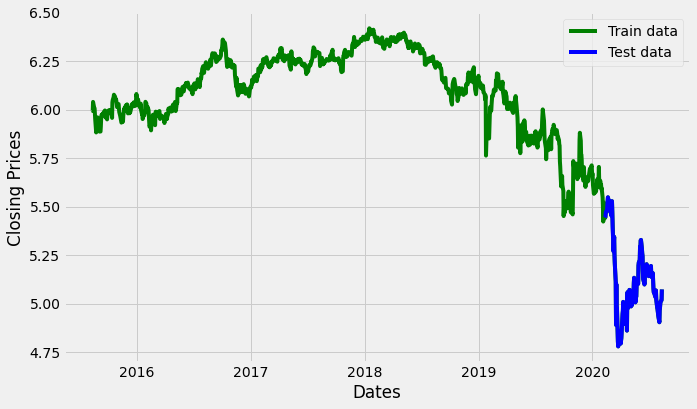

In [281]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


In [282]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4913.481, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4916.898, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4917.479, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4915.037, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4919.386, Time=1.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4915.426, Time=0.88 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4919.205, Time=1.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4918.401, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4917.093, Time=0.47 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4919.503, Time=2.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-4919.359, Time=0.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-4919.840, Time=2.46 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-4920.671, Time=0.42 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-4922.748, Time=0.67 sec
 ARIMA(0,1,3)(0,0,0

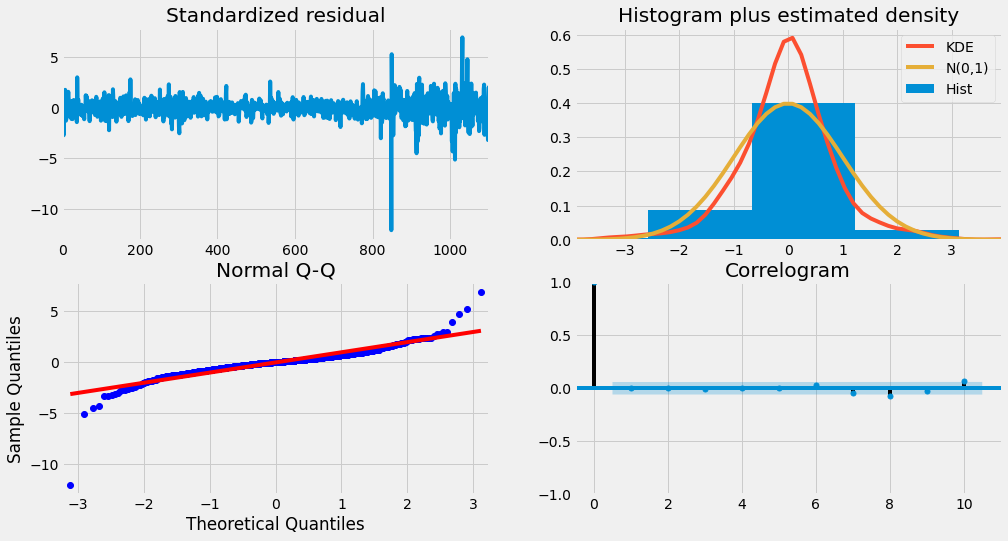

In [283]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [284]:
model = ARIMA(train_data, order=(0, 1, 3))  
fitted = model.fit(disp=-1)  
print(fitted.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1101
Model:                 ARIMA(0, 1, 3)   Log Likelihood                2466.374
Method:                       css-mle   S.D. of innovations              0.026
Date:                Wed, 12 Aug 2020   AIC                          -4922.748
Time:                        11:54:32   BIC                          -4897.728
Sample:                             1   HQIC                         -4913.284
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0005      0.001     -0.817      0.414      -0.002       0.001
ma.L1.D.Close    -0.0770      0.030     -2.549      0.011      -0.136      -0.018
ma.L2.D.Close    -0.0450      0.030     

Now let's start forecast the stock prices on the test dataset keeping 95% confidence level.


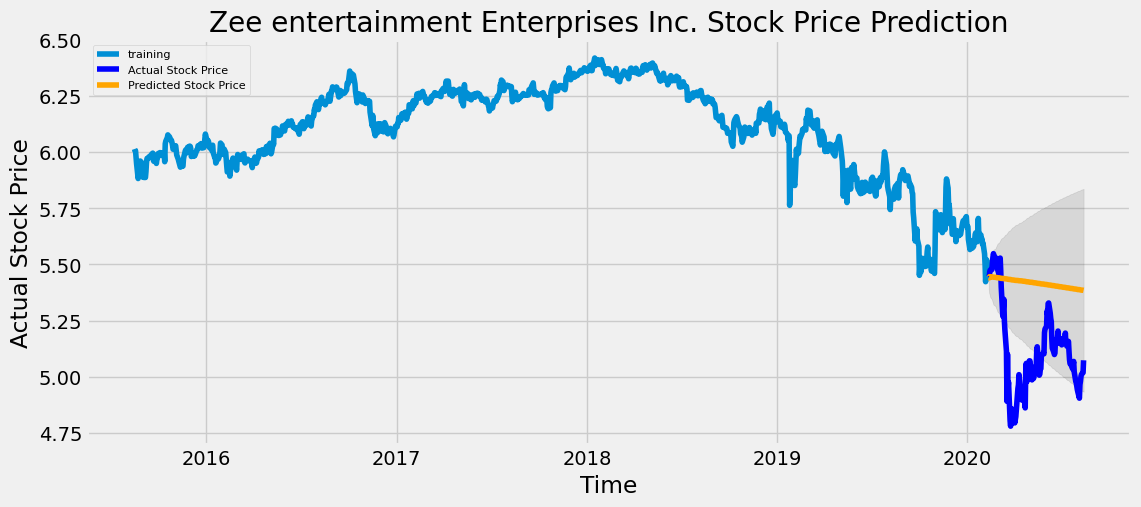

In [285]:
# Forecast
fc, se, conf = fitted.forecast(123, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Zee entertainment Enterprises Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [286]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.12028162053919715
MAE: 0.3067274410203206
RMSE: 0.34681640754035437
MAPE: 0.0610818653863711


Around 6.1% MAPE(Mean Absolute Percentage Error) implies the model is about 93.9% accurate in predicting the test set observations.


Here are significant changes between the one year data and 5 year data 